<a href="https://colab.research.google.com/github/Praneeth-18/DataMining2/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets for CMPE 255/multiclass_classification.csv"
df = pd.read_csv(path)

In [4]:
from pycaret.classification import *

In [10]:
se = setup(df, target = 'Label', use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,8778
1,Target,Label
2,Target type,Multiclass
3,Original data shape,"(1200, 6)"
4,Transformed data shape,"(1200, 6)"
5,Transformed train set shape,"(840, 6)"
6,Transformed test set shape,"(360, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [8]:
cmpmodel = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8679,0.9317,0.8679,0.8731,0.8674,0.8004,0.8030,0.3620
lightgbm,Light Gradient Boosting Machine,0.8512,0.9309,0.8512,0.8570,0.8511,0.7752,0.7779,0.9090
gbc,Gradient Boosting Classifier,0.8476,0.9312,0.8476,0.8539,0.8470,0.7697,0.7730,0.6740
et,Extra Trees Classifier,0.8429,0.9297,0.8429,0.8480,0.8428,0.7626,0.7649,0.2460
xgboost,Extreme Gradient Boosting,0.8417,0.9317,0.8417,0.8493,0.8416,0.7609,0.7641,0.4710
knn,K Neighbors Classifier,0.8333,0.9179,0.8333,0.8381,0.8329,0.7483,0.7508,0.0440
nb,Naive Bayes,0.8333,0.9309,0.8333,0.8358,0.8322,0.7478,0.7499,0.0280
ada,Ada Boost Classifier,0.8333,0.8669,0.8333,0.8384,0.8315,0.7473,0.7512,0.2500
lr,Logistic Regression,0.8250,0.9204,0.8250,0.8287,0.8246,0.7354,0.7374,0.6330
ridge,Ridge Classifier,0.8179,0.0000,0.8179,0.8206,0.8170,0.7245,0.7264,0.0260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
randfores = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8810,0.9528,0.8810,0.8822,0.8787,0.8189,0.8218
1,0.8452,0.9244,0.8452,0.8568,0.8471,0.7661,0.7696
2,0.8214,0.9045,0.8214,0.8305,0.8237,0.7306,0.7326
3,0.8571,0.9368,0.8571,0.8593,0.8580,0.7842,0.7844
4,0.8571,0.9222,0.8571,0.8583,0.8575,0.7844,0.7846
5,0.9048,0.9406,0.9048,0.9079,0.9035,0.8556,0.8581
6,0.8333,0.9453,0.8333,0.8409,0.8244,0.7477,0.7577
7,0.8690,0.9016,0.8690,0.8709,0.8694,0.8029,0.8034
8,0.8571,0.9126,0.8571,0.8697,0.8598,0.7859,0.7891


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
tuned_randfores = tune_model(randfores)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8929,0.9470,0.8929,0.8932,0.8914,0.8372,0.8389
1,0.8571,0.9140,0.8571,0.8651,0.8587,0.7842,0.7863
2,0.8214,0.9026,0.8214,0.8305,0.8237,0.7306,0.7326
3,0.8571,0.9284,0.8571,0.8593,0.8580,0.7842,0.7844
4,0.8333,0.9300,0.8333,0.8344,0.8337,0.7485,0.7487
5,0.8929,0.9398,0.8929,0.8967,0.8921,0.8378,0.8399
6,0.8452,0.9538,0.8452,0.8467,0.8404,0.7665,0.7711
7,0.8333,0.9106,0.8333,0.8373,0.8337,0.7497,0.7512
8,0.8452,0.9159,0.8452,0.8589,0.8485,0.7680,0.7711


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


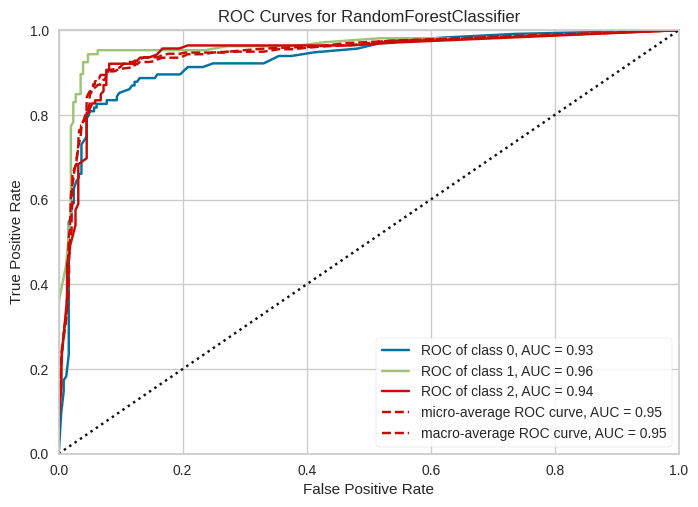

In [11]:
plot_model(randfores)

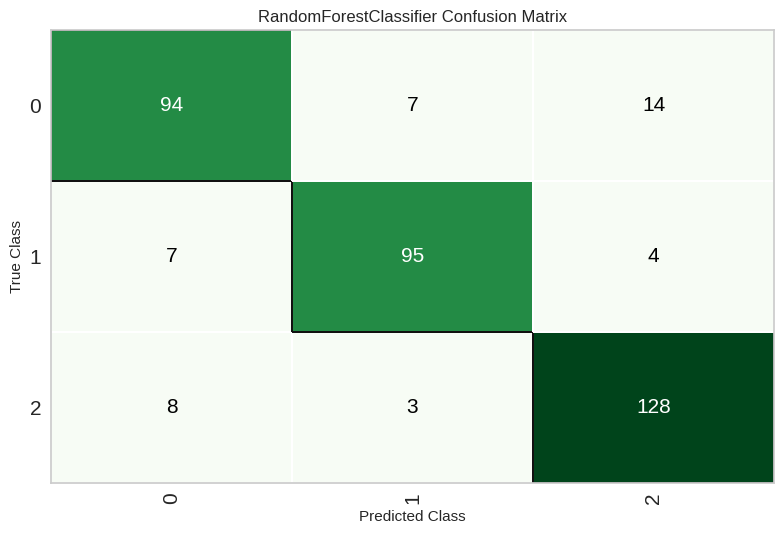

In [12]:
plot_model(randfores, plot = 'confusion_matrix')

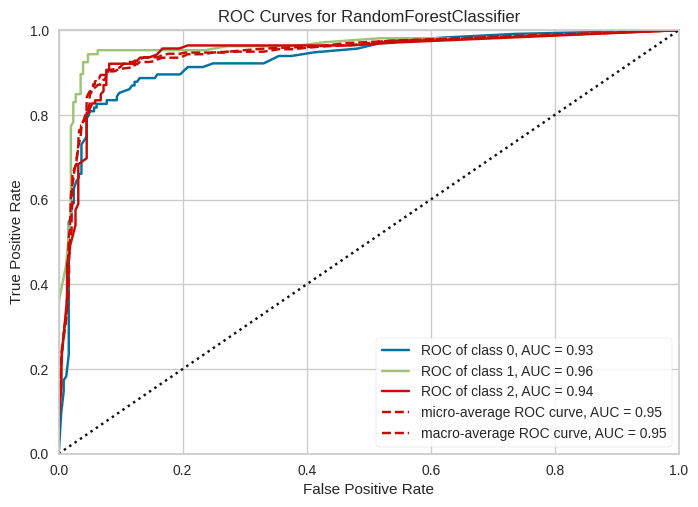

In [13]:
plot_model(randfores, plot = 'auc')

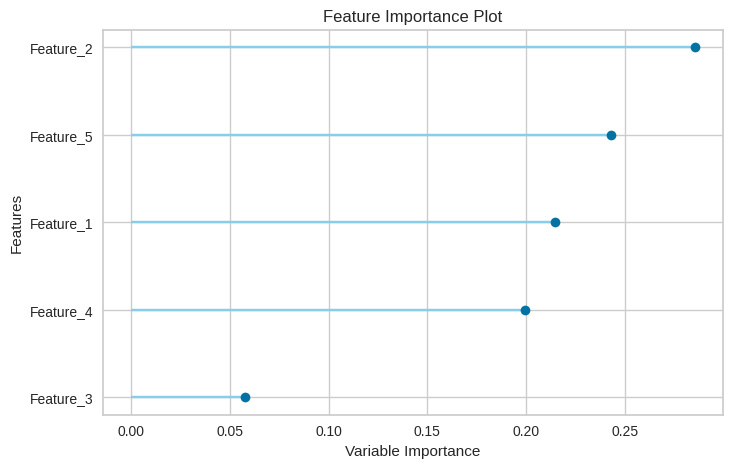

In [14]:
plot_model(randfores, plot = 'feature')

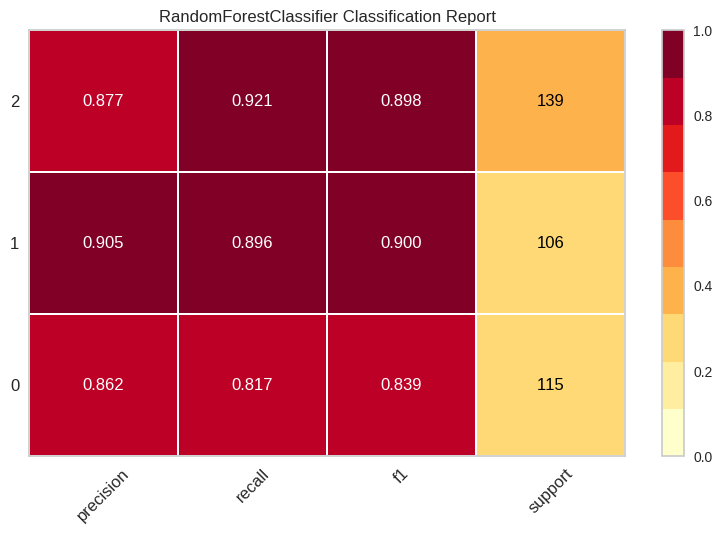

In [15]:
plot_model(randfores, plot = 'class_report')

In [16]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [17]:
evaluate_model(randfores)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
pred = predict_model(randfores)
pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8806,0.9448,0.8806,0.8804,0.8801,0.8192,0.8197


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Label,prediction_label,prediction_score
1024,0.865386,-1.021850,-0.101281,-0.882987,0.113272,2,2,0.85
584,1.029392,0.958706,0.434770,0.279050,-0.612410,1,1,0.96
313,2.176395,0.544843,-0.924564,-0.316220,-0.785479,1,1,1.00
682,-0.544483,-1.705014,0.506241,-0.880042,0.735581,2,2,0.95
371,0.432733,0.150528,-0.246383,-0.037073,-0.170678,2,2,0.46


In [19]:
n_data = df.copy()
predict = predict_model(randfores, data=n_data)
predict.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9642,0.9864,0.9642,0.9642,0.9641,0.9459,0.9459


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Label,prediction_label,prediction_score
0,-1.260204,0.775893,0.692723,0.850400,0.079777,0,0,0.67
1,1.802284,0.706754,-0.892788,-0.105603,-0.738282,1,1,1.00
2,-0.467839,1.477600,0.449219,1.043033,-0.379164,0,0,0.81
3,-1.124128,-1.012076,0.060086,-0.283416,0.656791,2,2,0.98
4,-1.384964,-0.546841,0.715873,0.078866,0.568617,2,2,1.00
